<h2>Classification Algorithms</h2>
<p>The task of these algorithms is to classify examples into one
of various classes based on the relation between the attributes and label in the
training dataset (e.g., the yes or no decision to approve a loan). Decision trees, k-
Nearest Neighbors (k-NN), Bayesian models, Induction rules, are various types of
classification algorithms. Some applications of classification problems are text
categorization, fraud detection, natural language processing, and market
segmentation. In the instant project, a binary classification problem has been
addressed using machine learning, and is similar to a loan approval problem. The aim
is to classify each example into two classes, as either earning less than $50,000 or
otherwise, using the given set of attributes for each example.<h3>Below is the image which gives us the idea of generic process for Machine learning process</h3></p>  <img src="classifyflow.png" alt="Girl in a jacket" width="300" height="500"> 

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from time import time

<h3>Getting the data</h3>

In [3]:
df=pd.read_csv('/Users/User/Downloads/census.csv')

<h2>Problem Statement:</h2> <p>Using the given dataset with attributes, the aim is to build a
predictive model that determines <b>income</b> level for people. Income levels are
binned at below $50K and above $50K annually (given in the dataset).</p>
<h3>Variables</h3>
<ul><li>age</li>
    <li>workclass</li>
    <li>education_level</li>
    <li>education-num</li>
    <li>marital-status</li>
    <li>occupation</li>
    <li>relationship</li>
    <li>race</li>
    <li>sex</li>
    <li>capital-gain</li>
    <li>capital-loss</li>
    <li>hours-per-week</li>
    <li>native-country</li>
</ul>

In [4]:
df.head(4)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


<p><h3>‘Income level’</h3> (the label) has been binned at the $50K level (>$50,000 and <$50,000)
to present a binary classification problem. Income level in the training set is highly
imbalanced, with only <strong>34014</strong> examples being <=50K (0.752156), while the remaining 0.247844
examples are <50K, which is the majority class. In such cases, the model is likely to be
better trained for the majority class, since the algorithms do not get enough
information about the minority class from the training data. This aspect needs to be
addressed in the model to achieve balanced accuracies on both classes of the label.</p>

In [10]:
df['income'].value_counts(dropna=False)/df.shape[0]

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

<h2>Assessing missing data</h2>
<p>Have a quick check on whether there’s any huge missing value in columns or rows which may largely affect the later analysis.</p>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


<h2>Age.</h2> <p>The data consists of people aged between 0-90 years. Even though age is not
normally distributed, incomes >50K are normally distributed within age groups.
However, there are ~34014 examples below 19 years who are not adults by definition
and are not likely to be earners by definition. The highest earners are in their 30s to
50s, as is the general trend across the world. Age data needs to be discretized into a
suitable number of bins, and examples that are below 18 years need to be removed
as their income is not likely to be substantial or due to regular employment.<p>

In [33]:
print(max(df[df['income']=='>50K']['age'].value_counts().index),min(df[df['income']=='>50K']['age'].value_counts().index))

90 19


In [37]:
categorical_cols=df.columns[df.dtypes==object].tolist()

<h2>Education</h2><p>From the above output we can clearly say that Higher education levels should result in better employment
opportunities and consequently, higher income. Among the 17 classes of Education
Levels, maximum examples are High School graduates, and all examples classified as
children have income <50K. The largest absolute number with income >50K is among
‘Bachelor Degree’, and the largest number in terms of proportion within class is among
Professional degree and Doctoral degree holders. None of the children have incomes
>50K.</p><ul>
<li>HS-grad         0.326898
 <li>Some-college    0.218898
 <li>Bachelors       0.167396
 <li>Masters         0.055592
 <li>Assoc-voc       0.043320
 <li>11th            0.035801
 <li>Assoc-acdm      0.033324
 <li>10th            0.027044
 <li>7th-8th         0.018199
 <li>Prof-school     0.017359
 <li>9th             0.014948
 <li>12th            0.012759
 <li>Doctorate       0.012030
 <li>5th-6th         0.009929
 <li>1st-4th         0.004909
 <li>Preschool       0.001592
Name: education_level, dtype: float64 
</ul>

<h2>Sex</h2>
<p>Although both males and females are almost evenly distributed (males are slightly
more in number), a larger proportion of males are in the higher income bracket,
indicating that sex does play an important role in determining income levels. The
effect of sex on incomes across different levels of education has been examined in
greater detail later in this paper.</p>

In [40]:
df[df['income']=='>50K']['sex'].value_counts(dropna=False)

 Male      9539
 Female    1669
Name: sex, dtype: int64

<h2>Data Preprocessing</h2>
<p>There are several features for each record that are non-numeric. Typically, learning algorithms expect
the input to be numeric, which requires that non-numeric features (called *categorical variables*) be
converted. Here convert categorical variables by using the label encoder and then **one-hot encoding** scheme.
Additionally, as with the non-numeric features, I need to convert the non-numeric target label, `’income’`
to numerical values for the learning algorithm to work. Since there are only two possible categories for
this label (“<=50K” and “>50K”), we can simply encode these two categories as `0` and `1`, respectively
which will be automatically converted or taken care of while using label encoder. Therefore, we will'''
</p>

In [45]:
le = LabelEncoder()

In [46]:
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [47]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


In [48]:
df.describe()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,2.204502,10.313321,10.118460,2.585180,5.969572,1.412697,3.680288,0.675048,1101.430344,88.595418,40.938017,36.401022,0.247844
std,13.217870,0.958122,3.817014,2.552881,1.500458,4.026400,1.597227,0.832353,0.468362,7506.430084,404.956092,12.007508,6.079856,0.431766
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


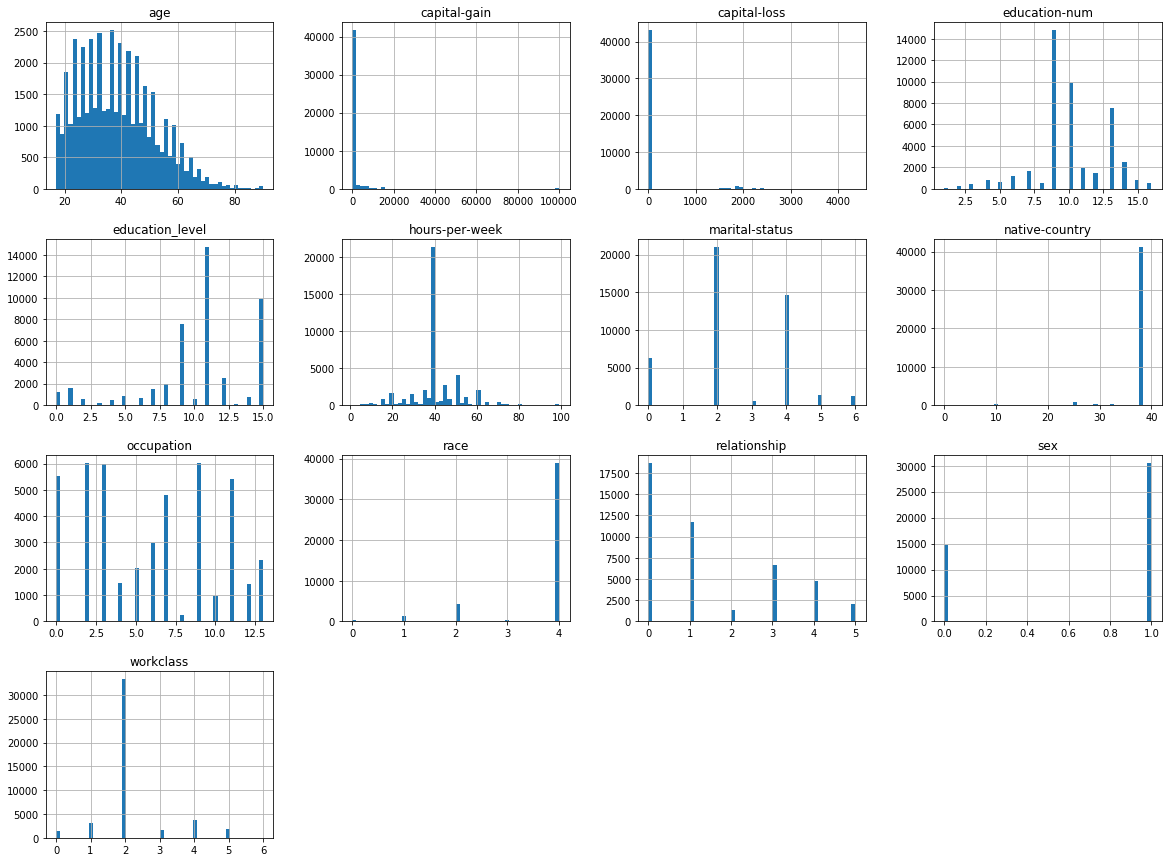

In [49]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.drop('income', axis=1).hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

<p>From the above histogram graph as you can see there seems skewness in ‘capital-gain’ , ‘capital-loss’,etc features. Use the quantitative result to confirm if I need to transform skewness.</p>

In [50]:
skew_feats=df[df.columns[:-1]].skew().sort_values(ascending=False)
skew_feats

capital-gain       11.789002
capital-loss        4.516304
workclass           1.148956
relationship        0.829174
age                 0.532816
hours-per-week      0.340545
occupation          0.107142
marital-status     -0.006803
education-num      -0.310621
sex                -0.747521
education_level    -0.945670
race               -2.518427
native-country     -4.217526
dtype: float64

<p><h3>Correlation heatmaps</h3> are ideal for comparing the measurement for each pair of dimension values. It also helps us in faeture selection</p>

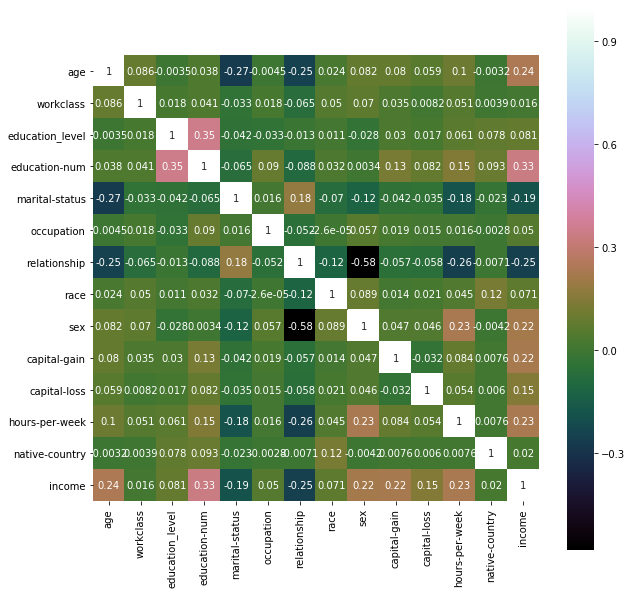

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='cubehelix',square=True,vmax=1)

In [53]:
y = df.pop('income')
X = df

<h4>One hot encoder</h4><p> OHE seems to give a better accuracy than scalling the whole data and also it will be possible to use in nueral network which deals with 1 and 0 efficiently</p>

In [56]:
ohe = OneHotEncoder(sparse=False)
X_ohe = ohe.fit_transform(X)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2)

<h3>Model Pipeline</h3>
<p>The function is created such a way that it gives all the required details like accuracy score, presision score, recall score, ect which will helps us the best and optimum model to choose from</p>

In [60]:
def base_model(model,X_train,X_test,y_train,y_test,modelname):
    data={}
    start = time()
    model.fit(X_train, y_train)
    end=time()
    data['train_time'] = end - start
    start = time()
    pred=model.predict(X_test)
    end = time()
    data['pred_time'] = end - start
    data['predicted_values']=pred
    start = time()
    score=accuracy_score(y_test, pred)
    end = time()
    data['score_time'] = end - start
    data['accuracy score']=score
    start = time()
    data['cross_val_score']=np.average(cross_val_score(model,X_train, y_train,cv=10))
    end = time()
    data['cross_val_score_time'] = end - start
    data['precission']=precision_score(y_test, pred)
    data['recall']=recall_score(y_test, pred)
    data['f1_score']=f1_score(y_test, pred)
    data['model']=modelname
    return data

In [63]:
model_name=['logistic_regression','support_vector_machine','RandomForestClassifier','knearest_neigbour_classification','AdaBoostClassifier','GradientBoostingClassifier']
list_model=[linear_model.LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=20000),\
            svm.SVC(gamma='scale',kernel='rbf',decision_function_shape='ovr'),RandomForestClassifier(n_estimators=100,max_depth=50, max_features="auto",random_state=0),\
            KNeighborsClassifier(n_neighbors=10),AdaBoostClassifier(n_estimators=800),GradientBoostingClassifier(n_estimators=500)]

#Note since there are lots of model around 6 it might take more than usual as its calculating every posibble scores and values and udating in our list. Lets say it would date more than 6 hours.
<strong>For details on the output look into model.csv file already provided in the folder</strong>

In [ ]:
list_data=[]
for i in range(0,len(model_name)):
    list_data.append(base_model(list_model[i],X_train,X_test,y_train,y_test,model_name[i]))

In [ ]:
output=pd.DataFrame(list_data)
output.head(10)

In [ ]:
output.to_csv('./model.csv')

<h3>Ploting the learning curve</h3>
<p>After choosing the best optimum model we can go ahead and visualize the outcome and then move forward with our next step that could be anything like suppose we can decide we require more data or suppose more data wont do anything instead more variety or more features may change the accuracy</P>

In [ ]:
def learning_curve_plot(model,X_train,y_train,title_name):
    train_sizes,train_scores, valid_scores = learning_curve(lg,X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
    train_scores_mean =- train_scores.mean(axis = 1)
    validation_scores_mean=-valid_scores.mean(axis =1)
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('error', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title_name, fontsize = 18, y = 1.03)
    plt.legend()
    plt.show()

<h3>Feature Importance</h3>
<p>Generally, it’s useful to know which features provide the most predictive power when
performing supervised learning on a dataset like the census data here. In this case,
it means we wish to identify a small number of features that most strongly predict whether
an individual makes at most or more than $50,000.Build a forest and compute the feature importances</p>

Feature ranking:
1. feature 0 (0.217662) {age}
2. feature 11 (0.123946) {hours-per-week}
3. feature 6 (0.103830) {relationship}
4. feature 9 (0.101951) {capital-gain}
5. feature 3 (0.095513) {education-num}
6. feature 5 (0.086937) {occupation}
7. feature 4 (0.081679) {marital-status}
8. feature 1 (0.048783) {workclass}
9. feature 2 (0.038473) {education_level}
10. feature 10 (0.033970) {capital-loss}
11. feature 8 (0.032098) {sex}
12. feature 12 (0.019278) {native-country}
13. feature 7 (0.015879) {race}


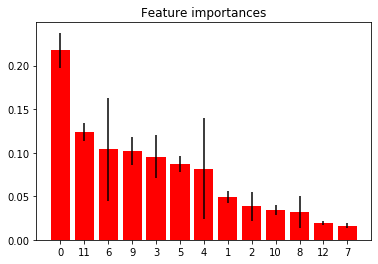

In [70]:
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) {%s}" % (f + 1, indices[f], importances[indices[f]],X.columns[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

</p>From the <strong>visualization above</strong>, we see that the top five most important
features contribute more than half of the importance of all features present
in the data. This hints that we can attempt to reduce the feature space and
simplify the information required for the model to learn. The code cell below
will use the same optimized model found earlier, and train it on the same
training set with only the top eight important features.</p>

In [77]:
features=[X.columns[indices[i]] for i in range(8)]
new_X = X[features]
ohe = OneHotEncoder(sparse=False)
new_X_ohe = ohe.fit_transform(new_X)
new_X_train,new_X_test,new_y_train,new_y_test = train_test_split(new_X_ohe,y,test_size=0.2)
base_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=20000),new_X_train,new_X_test,new_y_train,new_y_test,'logistic Regression')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


{'train_time': 11.115667343139648,
 'pred_time': 0.0059816837310791016,
 'predicted_values': array([0, 0, 1, ..., 0, 0, 0]),
 'score_time': 0.0009980201721191406,
 'accuracy score': 0.8582642343836374,
 'cross_val_score': 0.8591368980475746,
 'cross_val_score_time': 99.12277793884277,
 'precission': 0.7724024189114899,
 'recall': 0.6181258249010119,
 'f1_score': 0.6867057673509286,
 'model': 'logistic Regression'}

<p>As a result above show, the model performs a bit worse if I only used
important features. The accuracy is 2% lower and the f-score is 3% lower,
so in this case, I’ll still choose to use all feature to build the model
unless when the time for fitting model matters a lot.</p>

<h2>Deep Learning model</h2>
<p> As we can conclude from the machine learning algorith that the optimum accuracy which give 87% approx. To get more accuraccy let us dive into deep learning model.For that please do look into <b>main.py</b> and from <b>config.json</b> choose <b>traintestnet</b> as <b>True</b></p>
<p><b>Note :</b> The deep learning model gives approx 97% accuraccy </p>